# Comparing headlines topeaks and troughts of EBITDA

In [105]:
import pandas as pd
import numpy as np
import WranglerFunctions as wf
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from datetime import datetime
from datetime import timedelta

In [106]:
#Get the EBITDA Data for a specified company csv
csv = pd.read_csv('../Datasets/Financial_dataset/F3METL_Comp.csv', index_col = False)

CSV preparation 

In [107]:
clean_csv = wf.F3Metl_Comp_Wrangler(csv)


Look for peaks and troughs in the EBITDA Data for the each compaines. We can do this by looking at when the is a fall or rise on a set nunber of consecutive days
<br> So we would find where there is a change of direction and then compare each side for the number of days it was falling/rising before and after 

In [108]:
# Converting back to normal index since had problems with using datetime as an index
def getEBITDAUnique(df, companyName):
    earnings_unique = df[companyName]['EBITDA'].drop_duplicates()
    earnings_unique = pd.DataFrame(earnings_unique)
    earnings_unique = earnings_unique.dropna()
    earnings_unique = earnings_unique.reset_index()
    return earnings_unique

In [109]:
def getSignOfNum(num):
    if num <=0:
        return 0
    else:
        return 1

def getDatesofMajorChange(EBITDA,difference_boundary):
    date_array = np.array([])
    for i in range (1,len(EBITDA),1):
        difference_to_previous = EBITDA['EBITDA'][i]-EBITDA['EBITDA'][i-1]
        if(abs(difference_to_previous)>=difference_boundary):
            new_row = np.array([EBITDA['Dates'][i],EBITDA['EBITDA'][i],getSignOfNum(difference_to_previous)])
            if(len(date_array) == 0):
                date_array = np.vstack([new_row])
            else:
                date_array = np.vstack([date_array,new_row])
    cols = ['Dates','EBITDA','Direction']
    df = pd.DataFrame(date_array, columns=cols)
    return df

In [110]:
#Go through the data
def getDatesofChanges(name_of_company,difference_boundary):
    EBITDA = getEBITDAUnique(clean_csv, name_of_company)
    #print("Dates of Changes")
    #print(EBITDA)
    x = EBITDA['Dates']
    y = EBITDA['EBITDA']
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set(xlabel='Date Time', ylabel='EBITDA value',
           title='EBITDA vs Time')
    ax.grid()
    plt.show()
    
    date_array = np.array([])
    for i in range (1,len(EBITDA),1):
        difference_to_previous = EBITDA['EBITDA'][i]-EBITDA['EBITDA'][i-1]
        if(abs(difference_to_previous)>=difference_boundary):
            new_row = np.array([EBITDA['Dates'][i],EBITDA['EBITDA'][i],getSignOfNum(difference_to_previous)])
            if(len(date_array) == 0):
                date_array = np.vstack([new_row])
            else:
                date_array = np.vstack([date_array,new_row])
    if(len(date_array) ==0):
        print("DataFrame Empty")
        return
    cols = ['Dates','EBITDA','Direction']
    df = pd.DataFrame(date_array, columns=cols)
    return df

So for the 6 companies:<br>
        - RIO LN Equity  
        - GLEN LN Equity  
        - AAL LN Equity  
        - ANTO LN Equity  
        - EVR LN Equity  
        - BHP LN Equity	
        
For a refresh we will be looking at EBITDA(Earnings before interest, taxes, depreciation, and amortization)

Checks major changes in the data

## 1. RIO LN Equity  EBITDA
Wiki Extract = <i>"Rio Tinto Group is an Anglo-Australian multinational and the world's second-largest metals and mining corporation, behind BHP, producing iron ore, copper, diamonds, gold and uranium.The company was founded in 1873, when a multinational consortium of investors purchased a mine complex on the Rio Tinto, in Huelva, Spain, from the Spanish government. Since then, the company has grown through a long series of mergers and acquisitions to place itself among the world leaders in the production of many commodities, including aluminium, iron ore, copper, uranium and diamonds. Although primarily focused on extraction of minerals, Rio Tinto also has significant operations in refining, particularly for refining bauxite and iron ore. Rio Tinto has joint head offices in London (global and "plc") and Melbourne ("Limited" – Australia).</i>"

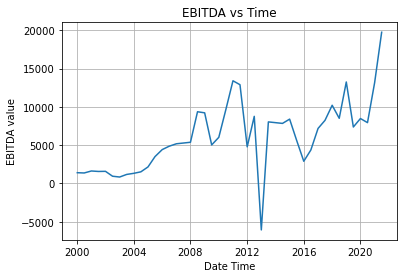

       Dates  EBITDA Direction
0 2012-12-31 -6066.0         0
1 2013-07-01  8038.0         1


In [111]:
difference_boundary = 10000
major_change_RIO = getDatesofChanges('RIO LN Equity',difference_boundary)
print(major_change_RIO)

#### RIO: Headlines on the 2012-12-31

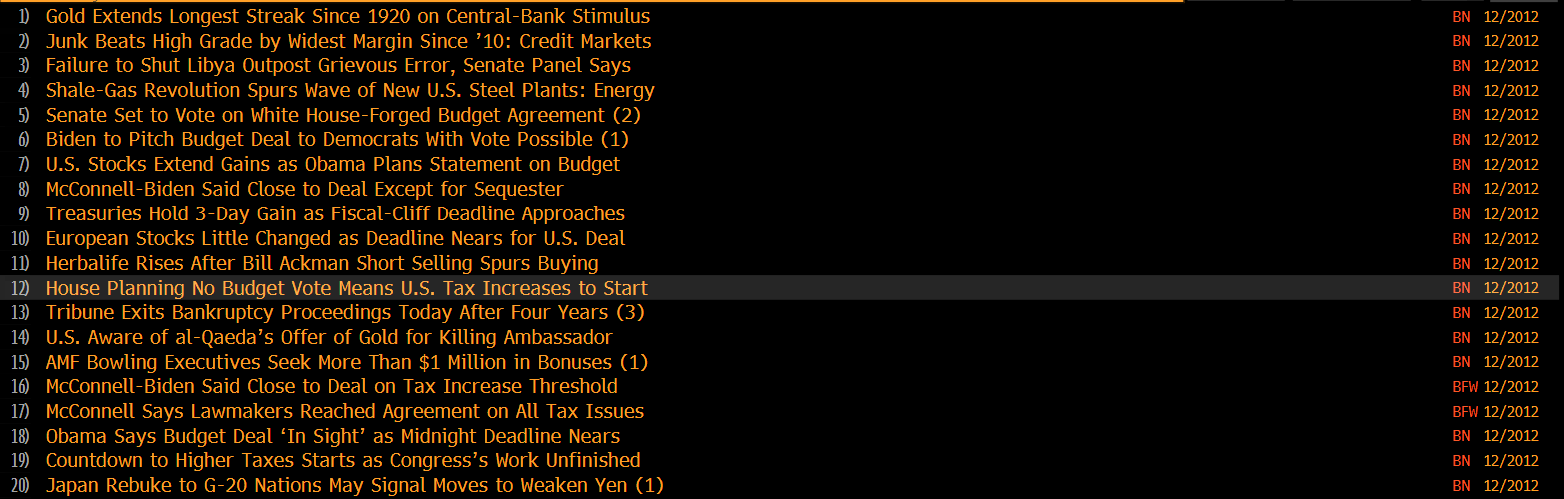

#### RIO: Headlines on the 2013-07-01

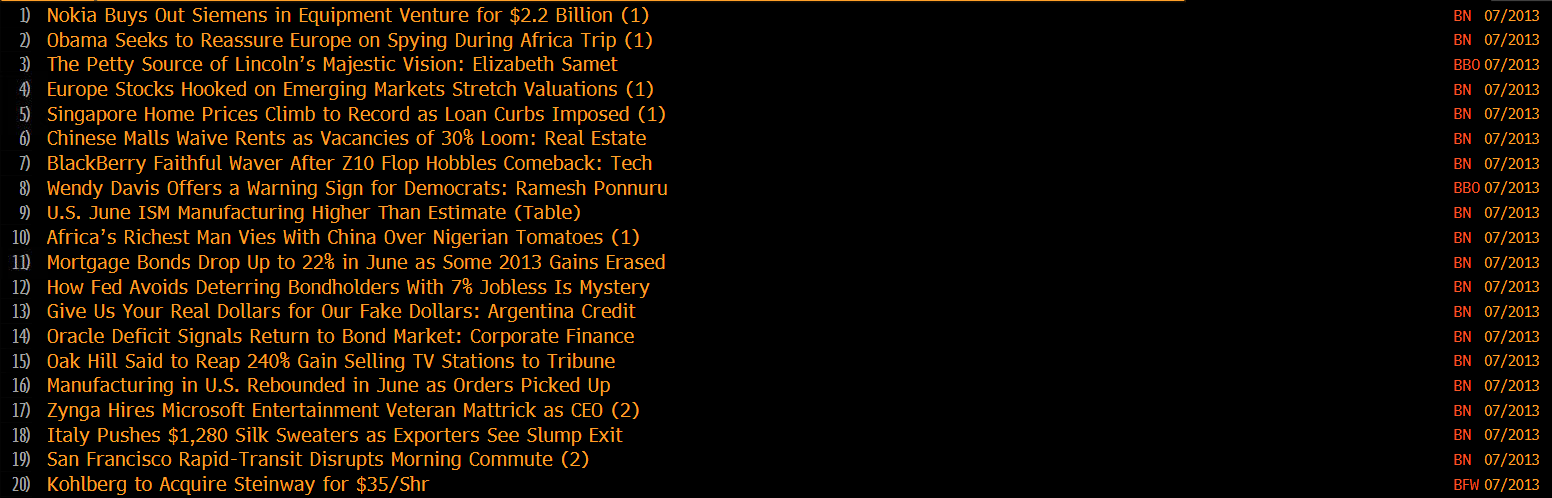

## 2. GLEN LN Equity  EBITDA

Wiki Extract = <i>"Glencore plc is an Anglo-Swiss multinational commodity trading and mining company with headquarters in Baar, Switzerland, its oil and gas head office in London and its registered office in Saint Helier, Jersey. The current company was created through a merger of Glencore with Xstrata on 2 May 2013. As of 2015, it ranked tenth in the Fortune Global 500 list of the world's largest companies. In the 2020 Forbes Global 2000, Glencore International was ranked as the 484th-largest public company in the world.</i>"

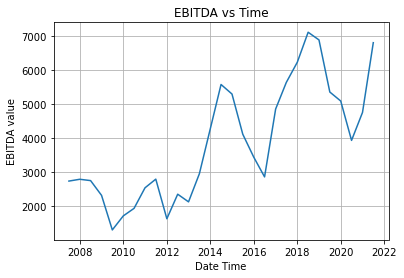

       Dates  EBITDA Direction
0 2014-06-30  5577.0         1
1 2021-06-30  6806.0         1


In [112]:
difference_boundary = 2000
major_change_GLEN = getDatesofChanges('GLEN LN Equity',difference_boundary)
print(major_change_GLEN)

#### GLEN: Headlines on the 2014-06-30

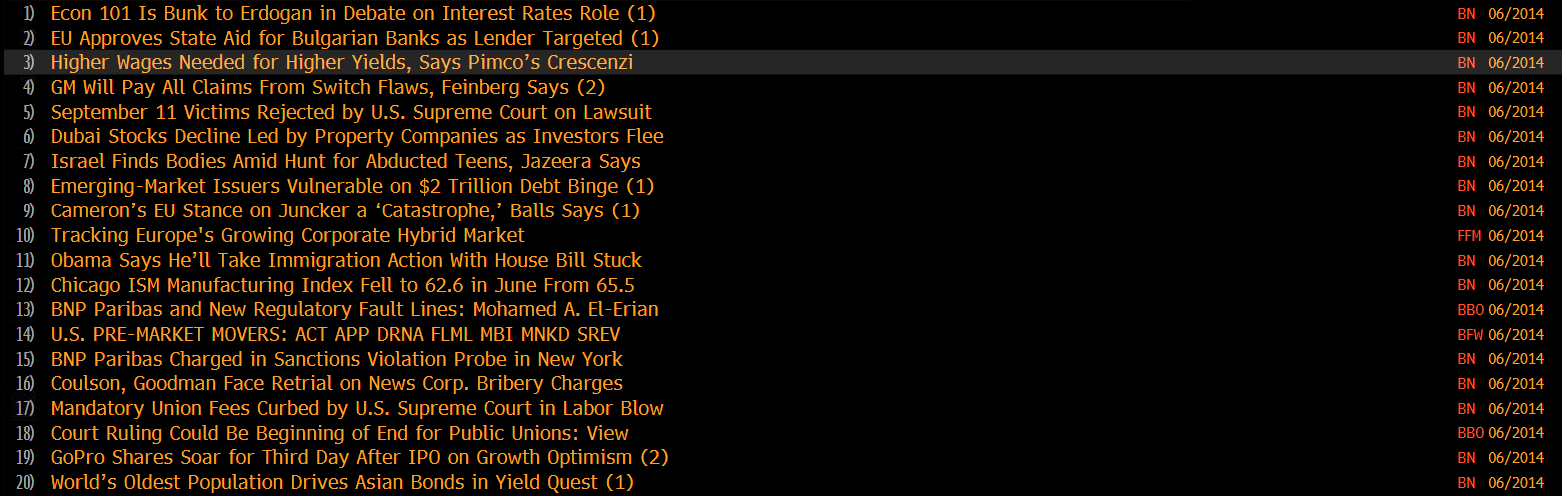

#### GLEN: Headlines on the 2021-06-30 

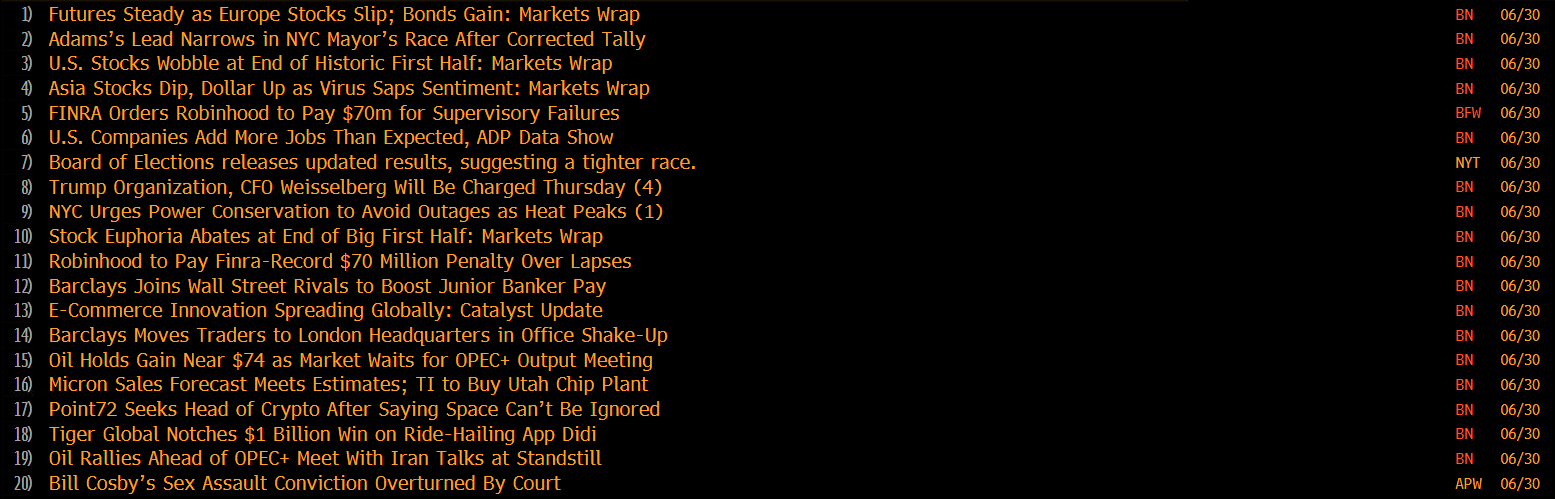

## 3. AAL LN Equity EBITDA

Wiki Extract = <i>"Anglo American plc is a British listed multinational mining company with headquarters in London, England. It is the world's largest producer of platinum, with around 40% of world output, as well as being a major producer of diamonds, copper, nickel, iron ore and metallurgical and thermal coal. The company has operations in Africa, Asia, Australia, Europe, North America and South America..</i>"

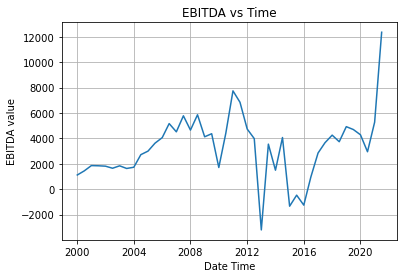

       Dates EBITDA Direction
0 2012-12-31  -3211         0
1 2021-06-30  12367         1


In [113]:
#7000 is when we get the inital value
difference_boundary = 7000
major_change_AAL = getDatesofChanges('AAL LN Equity',difference_boundary)
print(major_change_AAL)

#### AAL: Headlines on the 2012-12-31

Same date as ROI

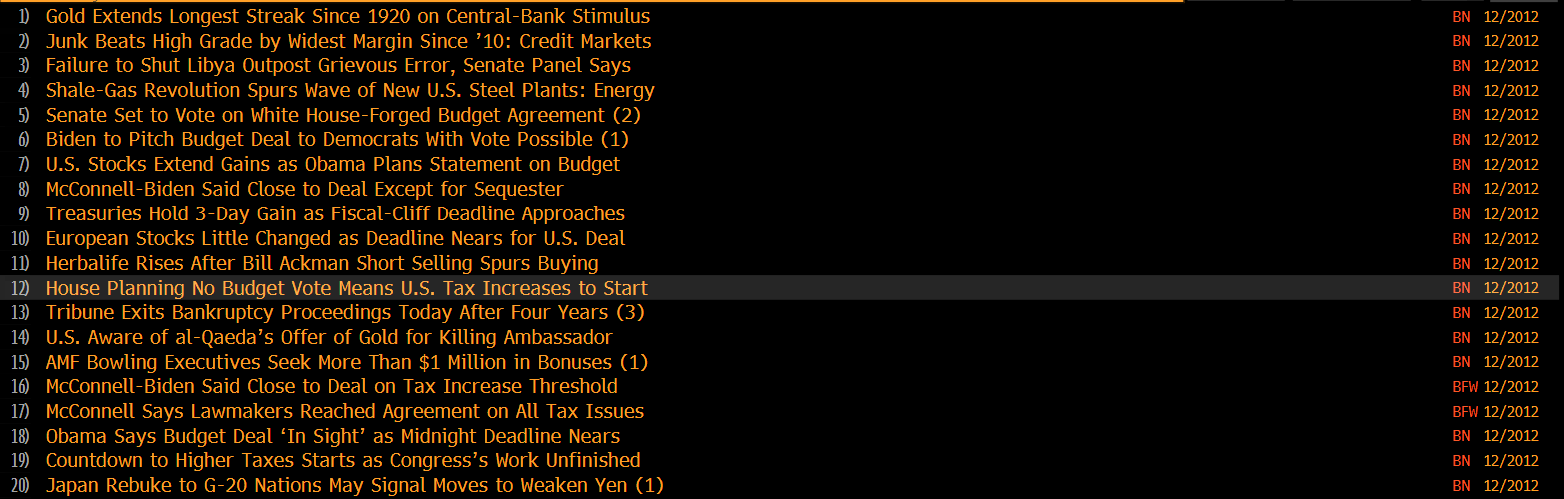

#### AAL: Headlines on the 2021-06-30 

Same date as GLEN

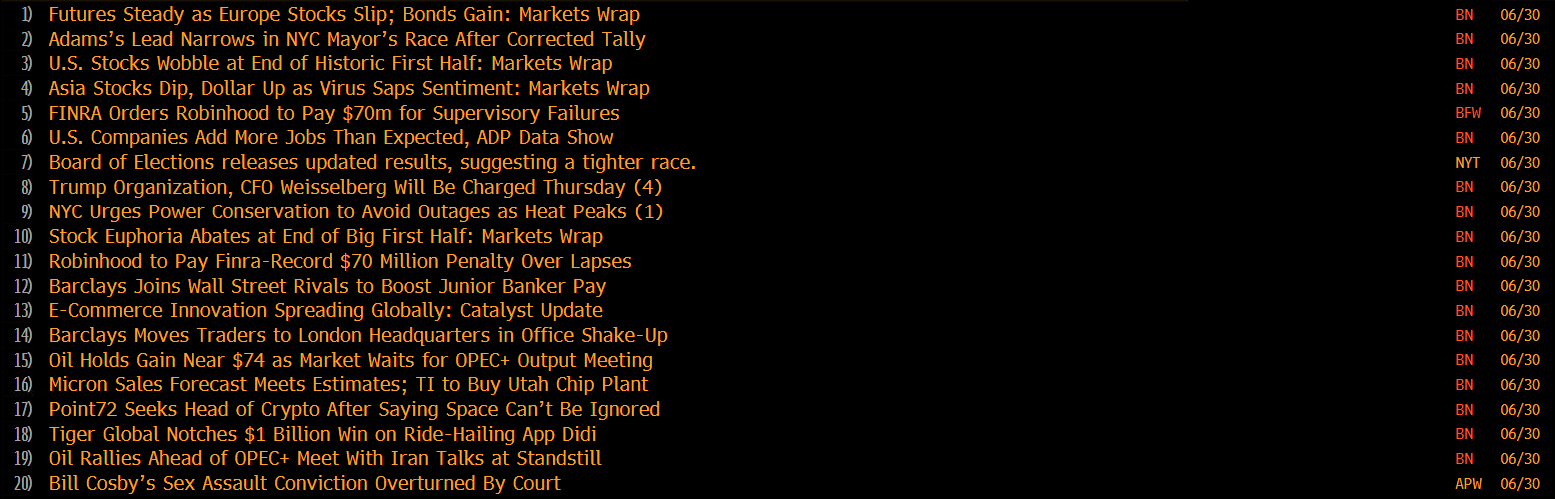

## 4. ANTO LN Equity  EBITDA

Wiki Extract = <i>"Antofagasta plc is a Chilean multinational. It is one of the most important conglomerates of Chile with equity participation in Antofagasta Minerals, the railroad from Antofagasta to Bolivia, Twin Metals in Minnesota and other exploration joint ventures in different parts from the world. Antofagasta is listed on the London Stock Exchange and is a constituent of the FTSE 100 Index.</i>"

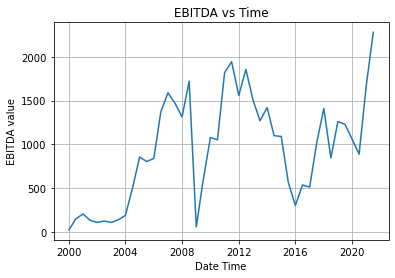

       Dates EBITDA Direction
0 2008-12-31   53.9         0


In [114]:
difference_boundary = 1000
major_change_ANTO = getDatesofChanges('ANTO LN Equity',difference_boundary)
print(major_change_ANTO)

#### ANTO: Headlines on the 2008-12-31

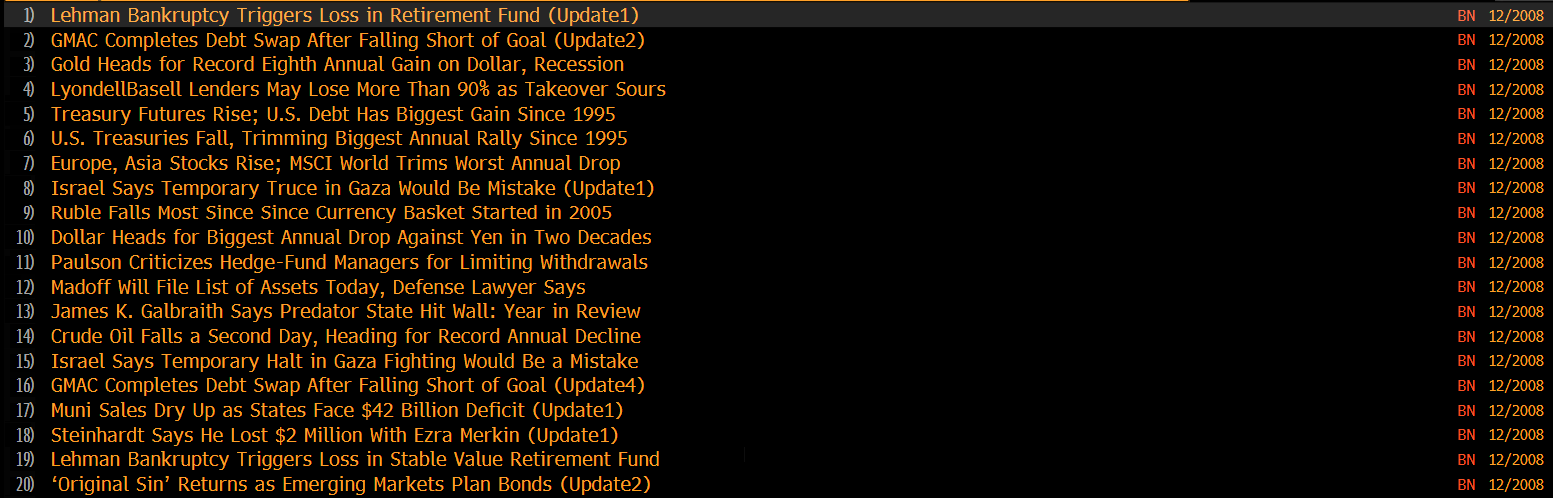

## 5. EVR LN Equity  EBITDA

Wiki Extract = <i>"EVRAZ plc (Russian: Евраз) is a UK-incorporated multinational steel manufacturing and mining company part-owned by Russian oligarchs. It has operations mainly in Russia as well as the USA, Canada, and Kasakhstan. As of 2015, the ultimate beneficial owners were Russian oligarchs Roman Abramovich (31.03%), chairman Alexander Abramov (21.59%) and CEO Aleksandr Frolov (10.78%) with the remaining 36.6% shares owned by other shareholders.</i>"

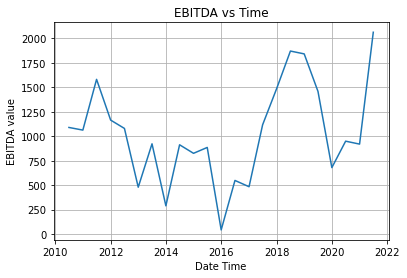

       Dates  EBITDA Direction
0 2021-06-30  2061.0         1


In [115]:
difference_boundary = 1000
major_change_EVR = getDatesofChanges('EVR LN Equity',difference_boundary)
print(major_change_EVR)

#### EVR: Headlines on the 2021-06-30

Same date with GLEN and AAL

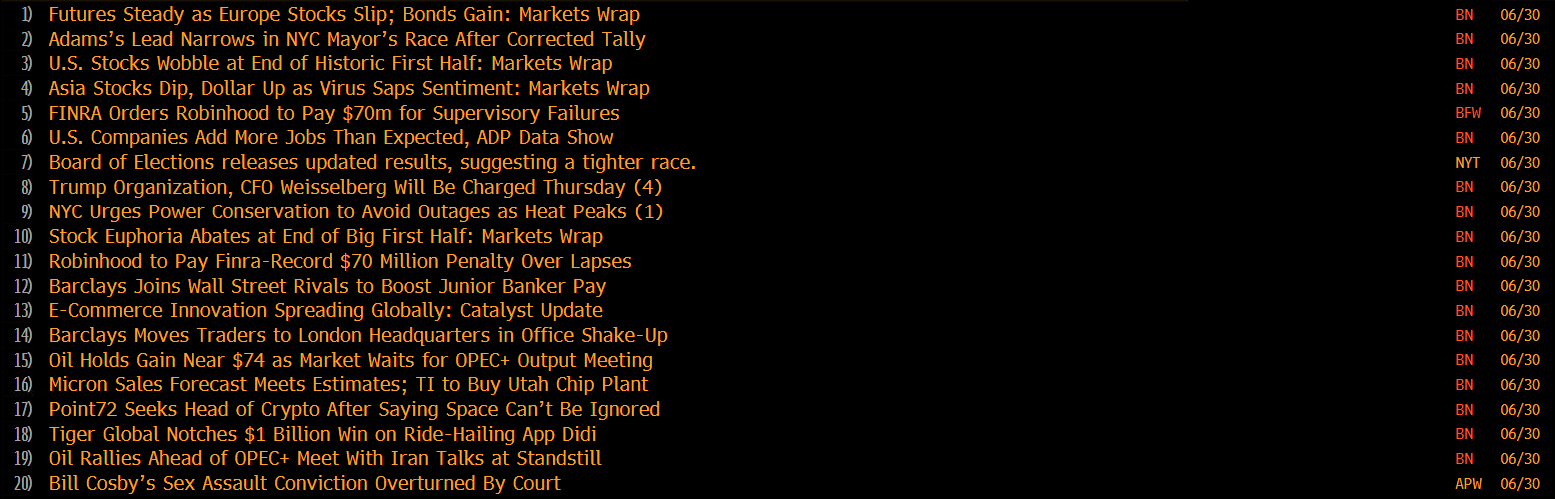

## 6. BHP LN Equity EBITDA

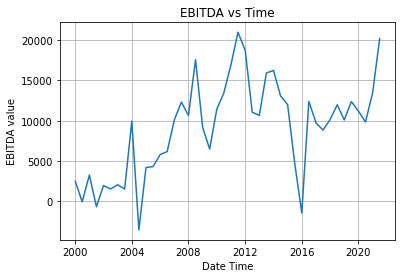

       Dates EBITDA Direction
0 2004-06-30  -3530         0
1 2016-06-30  12398         1


In [116]:
difference_boundary = 10000
major_change_BHP = getDatesofChanges('BHP LN Equity',difference_boundary)
print(major_change_BHP)

In [117]:
#down_dates = major_change_BHP[major_change_BHP['Direction']==0]
#up_dates = major_change_BHP[major_change_BHP['Direction']==1]
#print(down_dates)
#print(up_dates)

<p>Looked into integrating Bloomburg API with Python as I cannot export the Top News Headlines in Excel as it is not an option.</p>
<p>This means I have to it manually below. The first thing to notice is that the both share the same month and date</p>

#### BHP: Headlines on the 2004-06-30


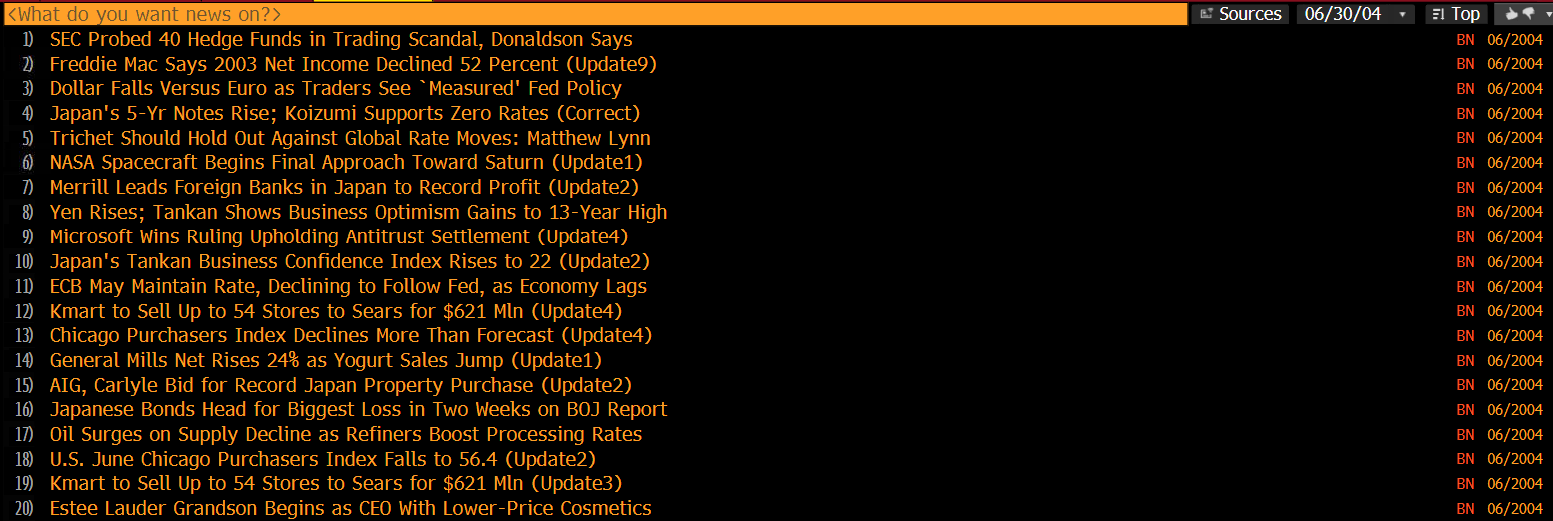

#### BHP:Headlines on the 2016-06-30


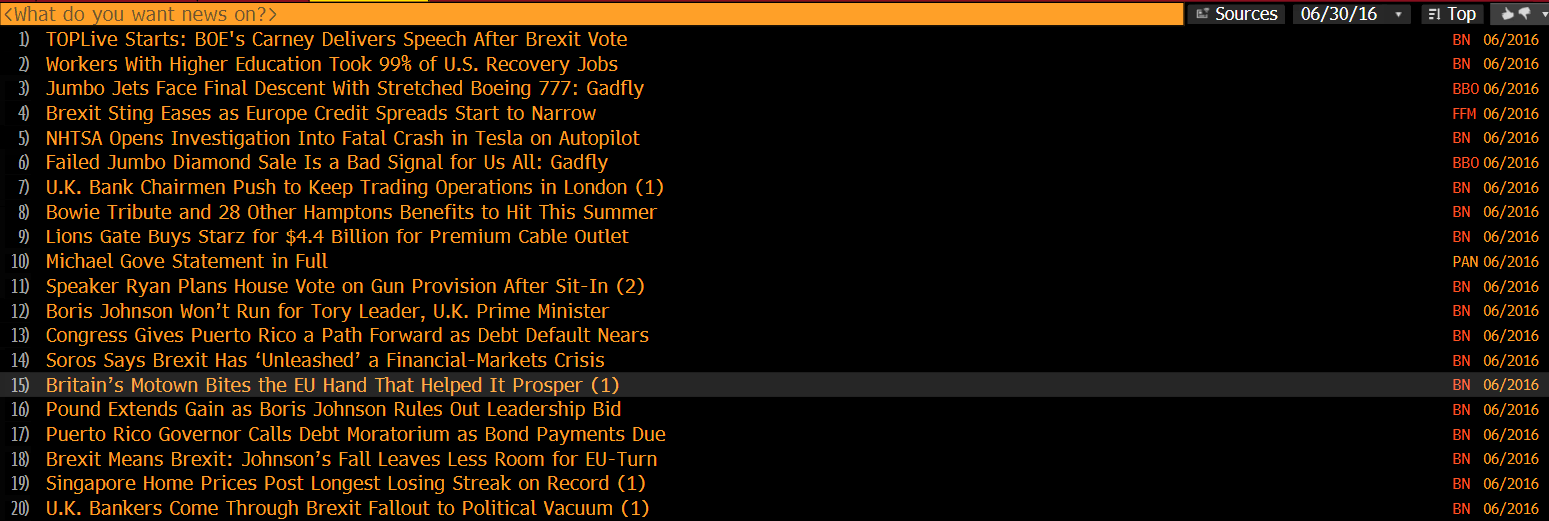